In [1]:
from platform import python_version

print(python_version())

3.9.12


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

In [4]:
from keras.layers import Input, Dense , Flatten
from keras.models import Model
from keras import layers

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [25]:
from tensorflow.keras.utils import to_categorical

y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

In [7]:
x_train[0].shape

(28, 28)

In [8]:
input_dim = 784


input_layer = keras.Input(shape=(28,28))

encoder = Flatten()(input_layer)
encoder = layers.Dense(512, activation='relu')(encoder)
encoder = layers.Dense(256, activation='relu')(encoder)
encoder = layers.Dense(128, activation='relu')(encoder)
encoder = layers.Dense(64, activation='relu')(encoder)
encoder = layers.Dense(32, activation='relu')(encoder)


decoder = layers.Dense(64, activation='relu')(encoder)
decoder = layers.Dense(128, activation='relu')(decoder)
decoder = layers.Dense(256, activation='relu')(decoder)
decoder = layers.Dense(512, activation='relu')(decoder)
decoder = layers.Dense(784, activation='sigmoid')(decoder)


decoder = keras.layers.Reshape([28,28])(decoder)


autoencoder = keras.models.Model(inputs=input_layer, outputs=decoder)


autoencoder.compile(optimizer='adam', loss='binary_crossentropy' , metrics='accuracy')

In [9]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080  

In [10]:
np.random.seed(42)

history = autoencoder.fit(x_train, x_train,
                          epochs=10,
                          batch_size=32,
                          shuffle=True,
                          validation_data=(x_test, x_test))


Epoch 1/10
1875/1875 [==============================] - 36s 17ms/step - loss: 0.3204 - accuracy: 0.0951 - val_loss: 0.3020 - val_accuracy: 0.1112
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2941 - accuracy: 0.1334 - val_loss: 0.2914 - val_accuracy: 0.1426
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2874 - accuracy: 0.1533 - val_loss: 0.2881 - val_accuracy: 0.1577
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2844 - accuracy: 0.1649 - val_loss: 0.2861 - val_accuracy: 0.1733
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2823 - accuracy: 0.1747 - val_loss: 0.2835 - val_accuracy: 0.1810
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2807 - accuracy: 0.1814 - val_loss: 0.2830 - val_accuracy: 0.1835
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2796 - accuracy: 0.1858 - val_loss: 0.2822 -

In [11]:
x_test_encoded= autoencoder.predict(x_test)
x_train_encoded= autoencoder.predict(x_train)



1875/1875 [==============================] - 9s 5ms/step


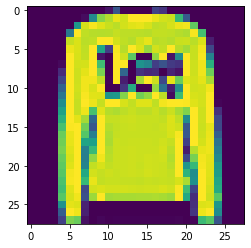

In [13]:
plt.imshow(x_test[1]) 

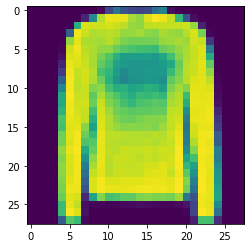

In [14]:
plt.imshow(x_test_encoded[1].reshape(28 , 28))

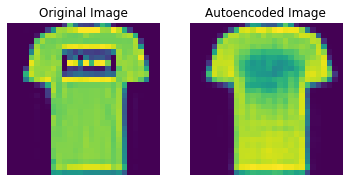

In [40]:
fig = plt.figure(figsize=(6,6))

fig.add_subplot(1,2,1)
plt.title("Original Image")
plt.imshow(x_train[1].reshape(28,28))
plt.axis("off")


fig.add_subplot(1,2,2)
plt.title("Autoencoded Image")
plt.imshow(x_train_encoded[1].reshape(28,28))
plt.axis("off")

plt.show()

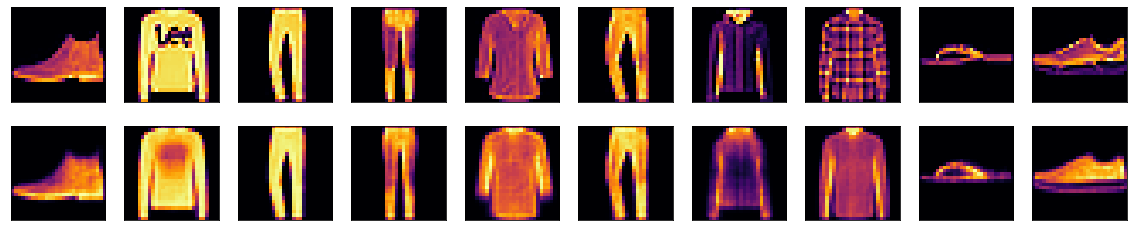

In [58]:
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28) , cmap='inferno')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the encoded feature vector
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(x_test_encoded[i].reshape(28, 28) , cmap='inferno')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Building a convolutional neural network for classification

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping


import time


model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))




model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))



model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
#early_stop = EarlyStopping(monitor='val_loss',patience=2)


In [37]:
trainStart = time.time()

model.fit(x_train_encoded , y_train , epochs=10, validation_data=(x_test_encoded , y_test))

trainEnd = time.time()

time_taken = round(trainEnd-trainStart,2)
    
print(f'Time taken for autoencoded data is: {time_taken}')


Epoch 1/10
1875/1875 [==============================] - 26s 13ms/step - loss: 0.5038 - accuracy: 0.8153 - val_loss: 0.4607 - val_accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4020 - accuracy: 0.8485 - val_loss: 0.4210 - val_accuracy: 0.8467
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3765 - accuracy: 0.8571 - val_loss: 0.4144 - val_accuracy: 0.8427
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3598 - accuracy: 0.8632 - val_loss: 0.3900 - val_accuracy: 0.8568
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3463 - accuracy: 0.8676 - val_loss: 0.3810 - val_accuracy: 0.8579
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3345 - accuracy: 0.8727 - val_loss: 0.3867 - val_accuracy: 0.8568
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3238 - accuracy: 0.8773 - val_loss: 0.4003 -

In [42]:

print(model.metrics_names)
model.evaluate(x_test_encoded , y_test)

['loss', 'accuracy']
313/313 [==============================] - 1s 4ms/step - loss: 0.7760 - accuracy: 0.7983


[0.7760039567947388, 0.79830002784729]